# Setup

In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
'''Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. 
For each passenger the data include information on their mileage history and on different ways they accrued or 
spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics 
for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID
Balance--Number of miles eligible for award travel
Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not


 '''

'Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. \nDraw the inferences from the clusters obtained.\n\nData Description:\n \nThe file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. \nFor each passenger the data include information on their mileage history and on different ways they accrued or \nspent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics \nfor the purpose of targeting different segments for different types of mileage offers\n\nID --Unique ID\nBalance--Number of miles eligible for award travel\nQual_mile--Number of miles counted as qualifying for Topflight status\n\ncc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:\ncc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:\ncc3_miles -- Number of miles earned with Small Bus

In [2]:
# reading the data tp Al

Al = pd.read_excel("C:/Users/Asus/Documents/Data Science/Assignments/Airlines.xlsx", sheet_name = 'data')

In [3]:
Al.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
# Checking for null values 
# there are no null values

Al.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [5]:
Al2= Al.copy()

In [6]:
Al2.shape

(3999, 12)

In [7]:
# Looking at data 

Al2.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


# Hierarchical 

In [9]:
# Normalization  function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [10]:
# Normalising the data. 
# selecting only the numerical part

Al_norm = norm_func(Al2.iloc[:,1:])

In [12]:
Al_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


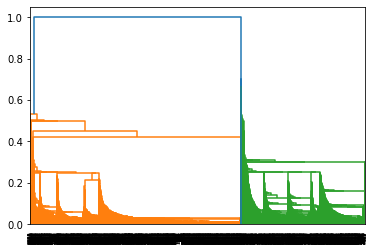

In [13]:
# creating dendogram with single likage 
dendrogram = sch.dendrogram(sch.linkage(Al_norm, method='single'))

In [14]:
# creating clusters using Agglomerative clustering 
# applying Euclidean affinity and single linkage 
# it is clear from the above data that the longestlink gives 2 clusters
# so we build 2 clusters

hcm = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'single')

In [15]:
# predicting the clusters using normalised data

y_hcm = hcm.fit_predict(Al_norm)

In [16]:
Adding the clusters labels to orginal data
Al2['h_cluster'] = y_hcm 

In [17]:
Al2.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [18]:
# Grouping the data by clusters

Al_cl = Al2.groupby('h_cluster').agg(['mean']).reset_index()
Al_cl

,h_cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1745.592843,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1
1,1,2173.169182,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0


In [ ]:
# from above table it is clear that all awarded ids formed one cullster and not awarded are in one cluster
# so the association good within clusters
#let us try with complete linkage and see how the dendo gram looks

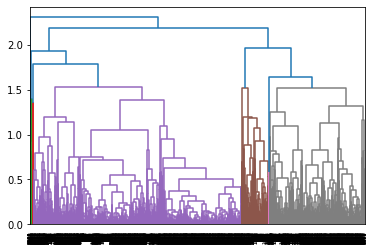

In [19]:
# creating  dendrogram using complete distance
dendrogram = sch.dendrogram(sch.linkage(Al_norm, method='complete'))

In [26]:
# From above dendogram  there seems 3 prominent clusters
# creating  clusters using complete linkage and euclidean affinity
hcm = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')

In [27]:
y_hcm = hcm.fit_predict(Al_norm)

In [28]:
Al2['h_cluster'] = y_hcm 

In [182]:
Al2.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [30]:
Al_cl = Al2.groupby('h_cluster').agg(['mean']).reset_index()
Al_cl

,h_cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1742.863172,97189.586113,239.728387,2.670524,1.007488,1.014295,28739.993193,15.588836,801.789653,2.449285,4628.761743,1.000000
1,1,3128.000000,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
2,2,2171.213381,59791.056611,88.188836,1.703484,1.018606,1.011085,10324.882423,9.192003,230.441013,0.672209,3824.887965,0.003167


In [ ]:
# unlike earlier there is no clear distiction if you look at the award column
# let us create another dendogram with average linkage

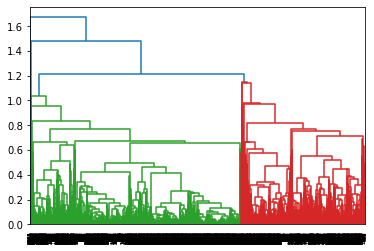

In [20]:
# creating dendogram

dendrogram = sch.dendrogram(sch.linkage(Al_norm, method='average'))

In [21]:
# creating clusters using average linkage
hcm = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'average')

In [22]:
y_hcm = hcm.fit_predict(Al_norm)

In [23]:
Al2['h_cluster'] = y_hcm 

In [24]:
Al2.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [25]:
Al_cl = Al2.groupby('h_cluster').agg(['mean']).reset_index()
Al_cl

,h_cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2013.704881,73542.85632,143.911389,2.059074,1.014518,1.012265,17096.29612,11.54418,440.531414,1.325657,4120.4801,0.369712
1,1,3128.000000,131999.50000,347.000000,2.500000,1.000000,1.000000,65634.25000,69.25000,19960.000000,49.250000,2200.2500,1.000000


In [ ]:
# it seems single linkage is better suited for this data 
# and when created two clusters that data devided clearly in to award cluster and non award cluster
# depends on our requirement we can create the number of clusters as we want in the same way

# Clustering using KMeans

In [12]:
#Importing required library

from sklearn.cluster import KMeans

In [13]:
# copying the normalised data from above
df = Al_norm.copy()
Al3 = pd.DataFrame(Al2).copy

In [14]:
type(Al2)

pandas.core.frame.DataFrame

In [15]:
#Selecting the numberical data
Al3 = Al2.iloc[:, 1:]
Al3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [18]:
# finding inertia for different clusters
l=[]
for i in range(2,10):
    model_kmeans = KMeans(n_clusters=i) 
    model_kmeans.fit(df)
    l.append(model_kmeans.inertia_)

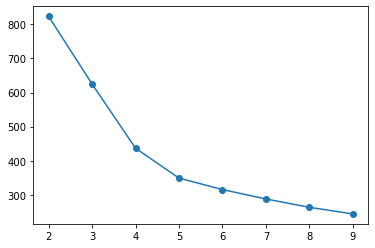

In [19]:
# plotting inertia and number of clusters

plt.scatter(list(range(2,10)),l)
plt.plot(list(range(2,10)),l)


In [ ]:
# from above diagram it is evident that the maximum inertia drop is at 4 or 5
# let us look at Chs score also which needs to be high 

In [22]:
# importing required modules

from sklearn.metrics import calinski_harabasz_score as chs

In [23]:
# calculating chs for different cluster sizes

nc=[2,3,4,5,6,7,8,9]
iner=[]    
for i in nc:
    km=KMeans(i)
    y=km.fit_predict(df)
    iner.append(chs(df,y))

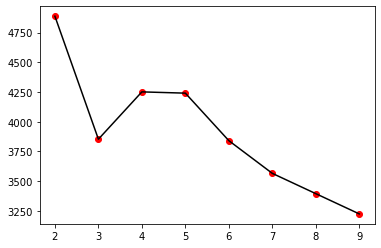

In [24]:
# plotting chs for different cluster sizes

plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

In [25]:
#From above score chs is high at 2 
#ket us build model with 2 clusters
#as it is also same with hirarchical clustering 

In [32]:
#Modeling the data with 2 clusters

model_kmeans = KMeans(n_clusters=2) 
model_kmeans.fit(df)

KMeans(n_clusters=2)

model_kmeans = KMeans(n_clusters=3) 
model_kmeans.fit(Al_norm)

In [33]:
# Predicting for the data

model_kmeans.fit_predict(df)

array([0, 0, 0, ..., 1, 0, 0])

In [34]:
# assigning values to md
md = pd.DataFrame(model_kmeans.fit_predict(df))

In [35]:
type(md)

pandas.core.frame.DataFrame

In [36]:
# Creating cluster label column with original data
Al3['h_cluster'] = md

In [37]:
Al3.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [38]:
Al_cl = Al3.groupby('h_cluster').agg(['mean']).reset_index()
Al_cl

,h_cluster,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1
1,1,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0


In [39]:
# as like in Hierarchical clustring here also the award column values are aligned exactly with cluters
# i.e all awarded rows are in one cluster 
# and others are in other cluster
# let us look at DBSCAN

# DBSCAN

In [40]:
# Importing the required libraries

from sklearn.cluster import DBSCAN 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


In [45]:
# Loading the data 

al4 = Al2.iloc[:, 1:]

In [46]:
# normalising the function using the normalising function

Al_norm = norm_func(al4)

In [47]:
Al_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [48]:
# assigning dataframe values to the array

array=Al_norm.values

In [49]:
#Transforming data to standardisation 
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [50]:
# Finding clusters for eps and sample using loop

eps = [.2, .4, .6,.8, 1.0]
poi = [5,10, 15, 20, 25]
clsdf = pd.DataFrame()
for i in eps:
    for j in poi:
        dbscan = DBSCAN(eps=i, min_samples=j)
        dbscan.fit(array)
        cls = dbscan.labels_.max() + 1
        print(' For radious of       {}     and    points of     {:2d}     the    Cluster number is :     {}'. format(i,j,cls))



 For radious of       0.2     and    points of      5     the    Cluster number is :     12
 For radious of       0.2     and    points of     10     the    Cluster number is :     11
 For radious of       0.2     and    points of     15     the    Cluster number is :     10
 For radious of       0.2     and    points of     20     the    Cluster number is :     10
 For radious of       0.2     and    points of     25     the    Cluster number is :     10
 For radious of       0.4     and    points of      5     the    Cluster number is :     6
 For radious of       0.4     and    points of     10     the    Cluster number is :     3
 For radious of       0.4     and    points of     15     the    Cluster number is :     3
 For radious of       0.4     and    points of     20     the    Cluster number is :     2
 For radious of       0.4     and    points of     25     the    Cluster number is :     2
 For radious of       0.6     and    points of      5     the    Cluster number is : 

In [52]:
# deciding the number of points rquires domain knoledge and varies depends on problem to problem
# let use take sample/number of points as  10 for our problem
# also take 0.6 as radius 
#it is decided aftertaking tral errors


In [51]:
# Building the model

dbscan = DBSCAN(eps=.6, min_samples=10)


In [53]:
# fitting the data 

dbscan.fit(array)

DBSCAN(eps=0.6, min_samples=10)

In [54]:
# Assigning the resultant clusters tp ta a data frame

cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [559]:
cl.head()

,cluster
0,0
1,0
2,0
3,0
4,1


In [55]:
# combining the cluster column with main data

Al5 = pd.concat([Al_norm,cl],axis=1)

In [561]:
Al5.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,1


In [56]:
# Grouping the dat based on cluster

Al_cl2 = Al5.groupby('cluster').agg(['mean']).reset_index()
Al_cl2

,cluster,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,0.037912,0.015563,0.343750,0.000000,0.593750,0.436895,0.367733,0.219599,0.242925,0.405549,0.75
1,0,0.035075,0.007864,0.176471,0.006955,0.001490,0.038620,0.106301,0.007349,0.012321,0.460566,0.00
2,1,0.057012,0.021549,0.415254,0.007797,0.002542,0.108036,0.182436,0.026748,0.047931,0.557826,1.00


In [ ]:
# From the above it is evident that there are two major clusters formed 
# -1 indicates the noice points which are not part of any clusters
